[0.16722408 0.8277592  1.         0.93528428 0.78225753 0.61362458
 0.45717308 0.31941208 0.19916529 0.0935703  0.        ]


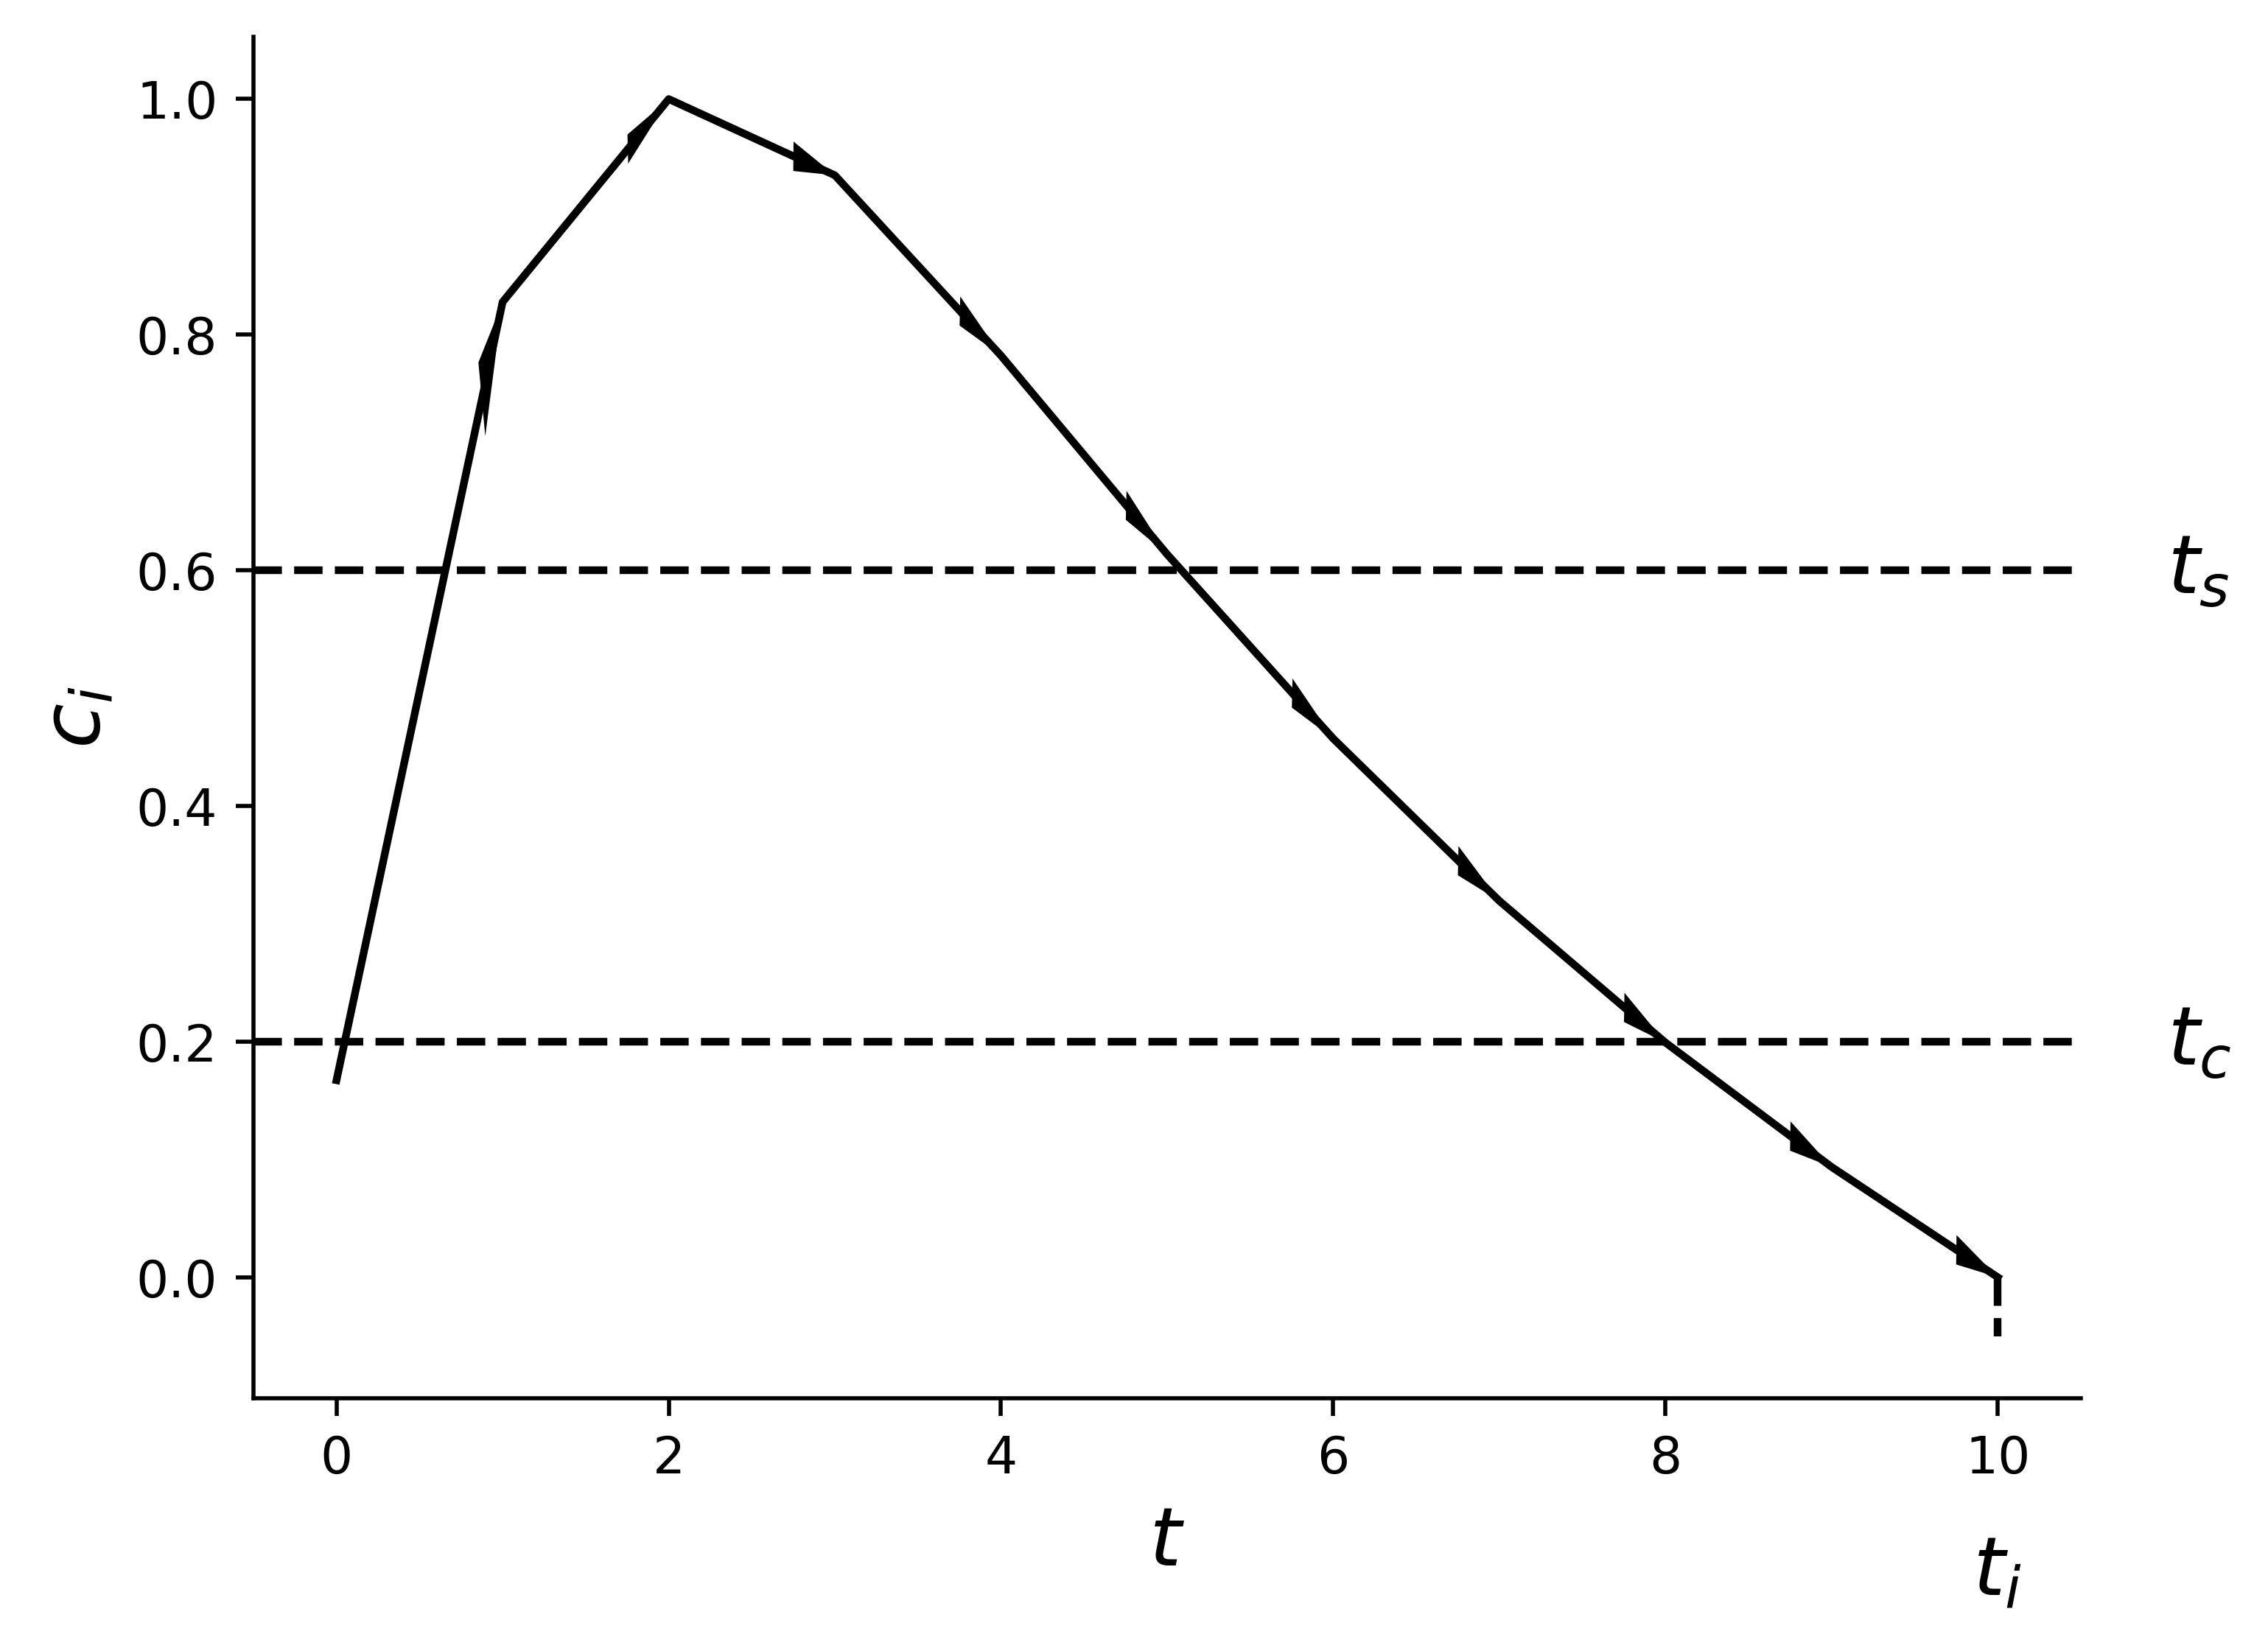

In [2]:
from model.person import Person
from model.parameters import parameters

from matplotlib import pyplot as plt
import matplotlib.patches as patches
from scipy.ndimage import gaussian_filter1d
import numpy as np

par = parameters()
p = Person(par)

c_arr = p.getContagiousArr(par)
smoothed_c_arr = gaussian_filter1d(c_arr, sigma=1)
print(c_arr)

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


plt.ylabel(r"$c_{i}$", fontsize=16)
plt.xlabel(r"$t$", fontsize=16)
plt.axhline(y=0.6, color='black', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='--')
plt.text(11.02, 0.6, '$t_s$', fontsize=16, va='center')
plt.text(9.85, -0.25, '$t_i$', fontsize=16, va='center')
plt.text(11.02, 0.2, '$t_c$', fontsize=16, va='center')

# Creazione dell'asse del tempo (numero di punti della curva)
t = np.linspace(0, 10, len(c_arr))

# Aggiunta delle frecce lungo la curva per indicare la direzione
for i in range(len(t) - 1):
    if i == 0:
        plt.arrow(t[i], c_arr[i], t[i+1] - t[i], c_arr[i+1] - c_arr[i], 
              shape='full', lw=0, length_includes_head=True, head_width=0.075, head_length=0.15, color='black')
    else:
        plt.arrow(t[i], c_arr[i], t[i+1] - t[i], c_arr[i+1] - c_arr[i], 
              shape='full', lw=0, length_includes_head=True, head_width=0.025, head_length=0.25, color='black')

t_i_arr_y = [0, -0.05]
t_i_arr_x = [10, 10]
plt.plot(c_arr, color='#000000')
plt.plot(t_i_arr_x, t_i_arr_y, color='#000000', linestyle='--')

plt.rcParams['figure.dpi'] = 800